<a href="https://colab.research.google.com/github/15nov2002/Exploratory-Data-Analysis/blob/main/21BDS0353.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/opt.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())

   rownames     PID Clinic Group  Age Black White Nat.Am Asian Hisp  ...  \
0         1  100034     NY     C   25   Yes   No     No    No        ...   
1         2  100042     NY     C   21   Yes   No     No    No        ...   
2         3  100067     NY     T   25   No    Yes    No    No   Yes  ...   
3         4  100083     NY     C   36   Yes   No     No    No        ...   
4         5  100091     NY     C   21   No    Yes    No    No   Yes  ...   

  BL..FN BL..S7 V5..AA V5..PG V5..TD  V5..TF V5..PI  V5..CR V5..FN  V5..S7  
0    NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
1  22.15  33.02    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
2  12.51  23.31    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
3    NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
4    NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  

[5 rows x 172 columns]


In [ ]:
# Check the dimensions of the dataset
print(f"Dataset Dimensions: {df.shape}")

Dataset Dimensions: (823, 172)


In [ ]:
# Generate summary statistics
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Columns: 172 entries, rownames to V5..S7
dtypes: float64(86), int64(13), object(73)
memory usage: 1.1+ MB
None
        rownames            PID         Age         BMI  BL.Cig.Day  \
count  823.00000     823.000000  823.000000  750.000000   92.000000   
mean   412.00000  252541.347509   25.978129   27.669333    8.717391   
std    237.72393  106737.056578    5.565973    7.127299    6.271032   
min      1.00000  100034.000000   16.000000   15.000000    1.000000   
25%    206.50000  200501.000000   22.000000   23.000000    5.000000   
50%    412.00000  202717.000000   25.000000   26.000000    7.500000   
75%    617.50000  302208.000000   30.000000   31.000000   10.000000   
max    823.00000  402477.000000   44.000000   68.000000   30.000000   

       BL.Drks.Day  N.prev.preg  N.living.kids     Tx.time  N.extractions  \
count    13.000000   606.000000     522.000000  395.000000     447.000000   
mean      4.461538     

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/opt.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
print("Initial Dataset:")
print(df.head())

# Step 1: Check Dataset Information
print("\nDataset Information:")
print(df.info())

# Step 2: Check for Missing Values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Step 3: Handle Missing Valuese
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:  # Numerical columns
        df[col].fillna(df[col].median(), inplace=True)
    elif df[col].dtype == 'object':  # Categorical columns
        df[col].fillna(df[col].mode()[0], inplace=True)

# Verify if missing values are handled
print("\nMissing Values After Handling:")
print(df.isnull().sum())

# Step 4: Check for Duplicates
print("\nNumber of Duplicates in the Dataset:")
print(df.duplicated().sum())

# Remove Duplicates
df.drop_duplicates(inplace=True)

# Verify if duplicates are removed
print("\nNumber of Duplicates After Removal:")
print(df.duplicated().sum())

# Step 5: Handle Inconsistent Data
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique Values in {col}:")
    print(df[col].unique())

# Standardize categorical columns
for col in categorical_columns:
    df[col] = df[col].str.strip().str.lower()

# Verify standardized categorical columns
for col in categorical_columns:
    print(f"\nStandardized Unique Values in {col}:")
    print(df[col].unique())

# Step 6: Handle Outliers in Numerical Columns

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers to the lower and upper bounds
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Verify if outliers are handled
print("\nOutliers Handled in Numerical Columns.")

# Step 7: Check for Irrelevant Columns
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
df.drop(columns=constant_columns, inplace=True)

print("\nIrrelevant Columns Removed:")
print(constant_columns)

# Step 8: Convert Data Types (if necessary)
# Convert categorical columns to 'category' type for efficiency
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Convert date columns to datetime

# Verify data types
print("\nUpdated Data Types:")
print(df.dtypes)

# Step 9: Save the Cleaned Dataset
df.to_csv('cleaned_dataset.csv', index=False)

print("\nData Cleaning Completed. Cleaned Dataset Saved as 'cleaned_dataset.csv'.")

Initial Dataset:
   rownames     PID Clinic Group  Age Black White Nat.Am Asian Hisp  ...  \
0         1  100034     NY     C   25   Yes   No     No    No        ...   
1         2  100042     NY     C   21   Yes   No     No    No        ...   
2         3  100067     NY     T   25   No    Yes    No    No   Yes  ...   
3         4  100083     NY     C   36   Yes   No     No    No        ...   
4         5  100091     NY     C   21   No    Yes    No    No   Yes  ...   

  BL..FN BL..S7 V5..AA V5..PG V5..TD  V5..TF V5..PI  V5..CR V5..FN  V5..S7  
0    NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
1  22.15  33.02    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
2  12.51  23.31    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
3    NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
4    NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  

[5 rows x 172 columns]

Dataset Information:
<class 'pandas.cor

<ipython-input-4-13057364f984>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-4-13057364f984>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 



Unique Values in OTF1:
['7.056' '6.388' '5.893' '4.847' '5.6' '8.916' '5.815' '5.129' '5.385'
 '7.56' '6.097' '6.053' '4.989' '6.707' '6.726' '5.177' '7.051' '5.042'
 '5.621' '6.073' '7.375' '7.833' '3.284' '4.144' '5.728' '5.088' '7.332'
 '4.777' '7.227' '6.305' '4.047' '4.184' '4.696' '6.471' '4.625' '3.907'
 '7.476' '3.905' '5.977' '5.467' '3.684' '5.289' '8.04' '4.311' '4.137'
 '4.445' '3.432' '8.48' '4.529' '8.385' '5.332' '3.746' '3.205' '4.757'
 '4.6' '3.629' '3.07' '1.372' '3.47' '2.598' '8.2' '8.237' '7.019' '5.602'
 '6.927' '7.873' '6.076' '5.803' '2.936' '4.303' '11.228' '4.493' '5.052'
 '.' '6.897' '1.813' '3.596' '6.138' '9.684' '4.712' '4.085' '4.494'
 '5.991' '3.957' '3.858' '7.669' '6.928' '4.68' '5.46' '1.943' '5.457'
 '1.85' '3.193' '2.434' '3.895' '2.531' '1.941' '6.102' '4.354' '1.786'
 '2.889' '11.63' '12.224' '3.19' '7.382' '3.595' '11.657' '6.594' '5.633'
 '16.074' '4.286' '3.521' '1.889' '12.147' '1.612' '12.762' '2.701' '6.41'
 '2.708' '2.272' '4.444' '1.434'

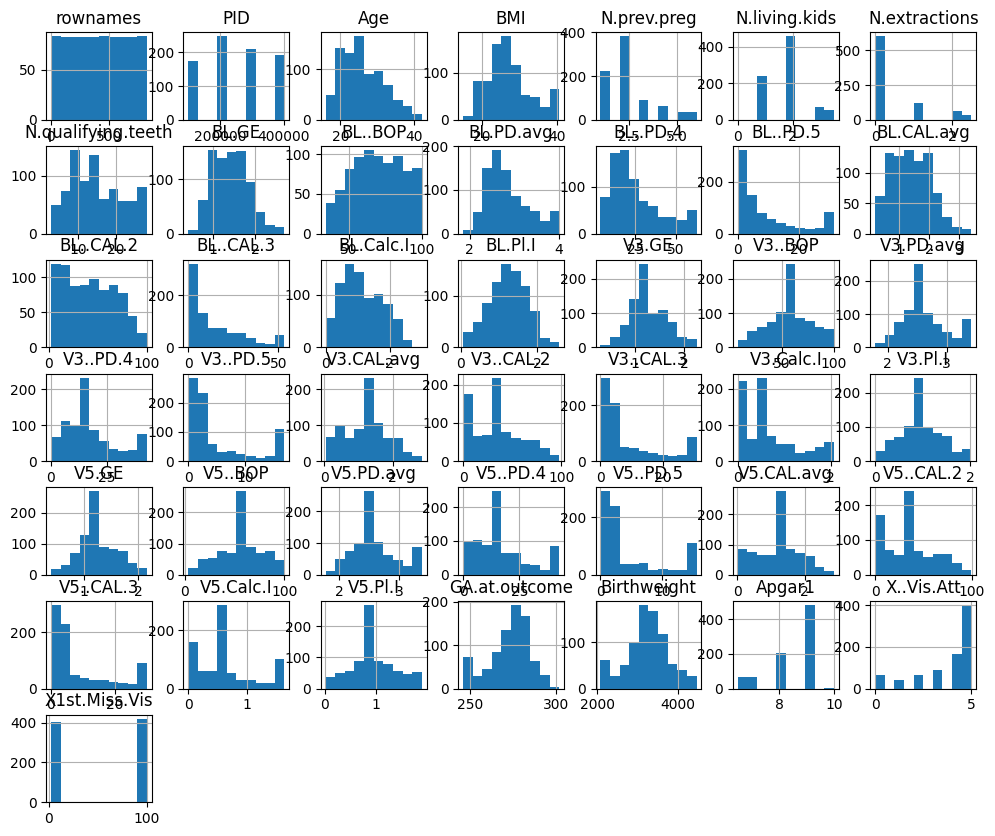

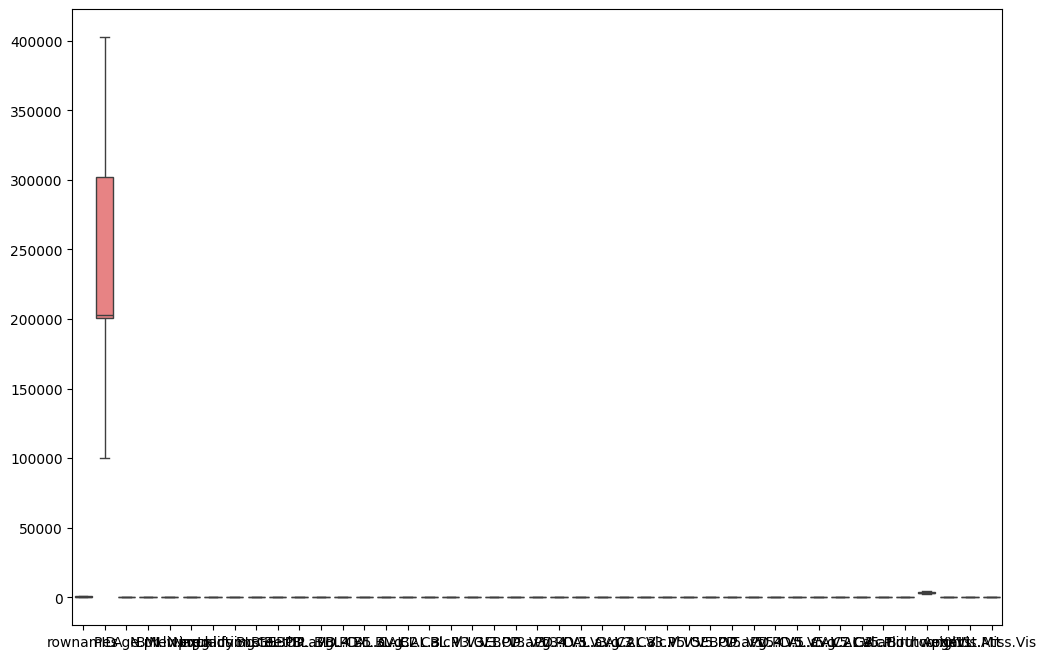

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical columns
df.hist(figsize=(12, 10))
plt.show()

# Boxplot for numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.show()

# Count plot for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.show()

Initial Dataset:
   rownames     PID Clinic Group  Age Black White Nat.Am Asian Hisp  ...  \
0         1  100034     NY     C   25   Yes   No     No    No        ...   
1         2  100042     NY     C   21   Yes   No     No    No        ...   
2         3  100067     NY     T   25   No    Yes    No    No   Yes  ...   
3         4  100083     NY     C   36   Yes   No     No    No        ...   
4         5  100091     NY     C   21   No    Yes    No    No   Yes  ...   

  BL..FN BL..S7 V5..AA V5..PG V5..TD  V5..TF V5..PI  V5..CR V5..FN  V5..S7  
0    NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
1  22.15  33.02    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
2  12.51  23.31    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
3    NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
4    NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  

[5 rows x 172 columns]

Numerical Columns for Univariate Analys

ValueError: num must be an integer with 1 <= num <= 9, not 10

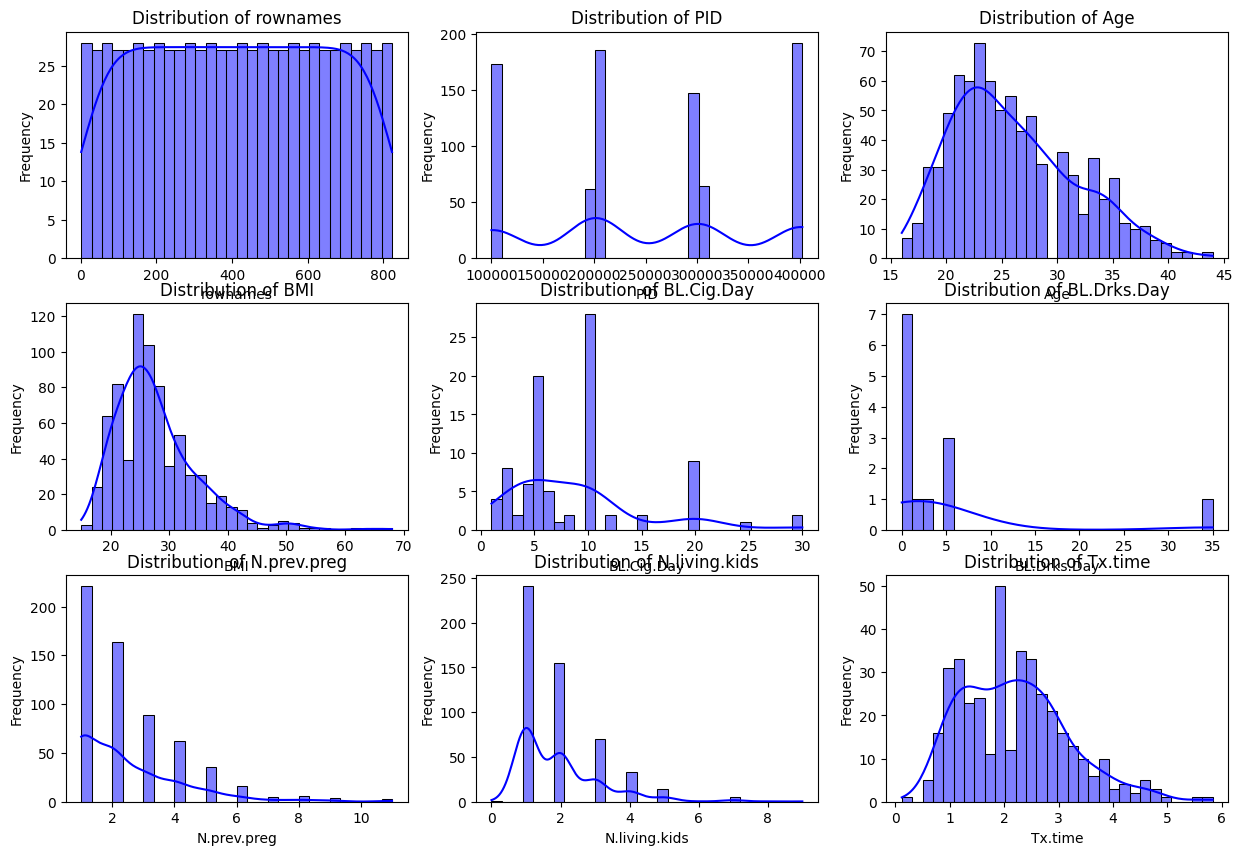

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/opt.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
print("Initial Dataset:")
print(df.head())

# Step 1: Univariate Analysis
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("\nNumerical Columns for Univariate Analysis:")
print(numerical_columns)

# Plot histograms for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot boxplots for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Categorical Columns: Count Plots
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns for Univariate Analysis:")
print(categorical_columns)

# Plot count plots for categorical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 2: Bivariate Analysi

# 2.1 Numerical vs Numerical: Scatter Plots and Correlation Matrix
plt.figure(figsize=(15, 10))
for i in range(len(numerical_columns)):
    for j in range(i + 1, len(numerical_columns)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df, x=numerical_columns[i], y=numerical_columns[j], alpha=0.6, color='green')
        plt.title(f'{numerical_columns[i]} vs {numerical_columns[j]}')
        plt.xlabel(numerical_columns[i])
        plt.ylabel(numerical_columns[j])
        plt.show()

# Correlation matrix for numerical columns
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

#Numerical vs Categorical: Boxplots and Violin Plots
# Boxplots for numerical vs categorical columns
plt.figure(figsize=(15, 10))
for num_col in numerical_columns:
    for cat_col in categorical_columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df, x=cat_col, y=num_col, palette='pastel')
        plt.title(f'{num_col} vs {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.xticks(rotation=45)
        plt.show()

# Violin plots for numerical vs categorical columns
plt.figure(figsize=(15, 10))
for num_col in numerical_columns:
    for cat_col in categorical_columns:
        plt.figure(figsize=(8, 6))
        sns.violinplot(data=df, x=cat_col, y=num_col, palette='pastel')
        plt.title(f'{num_col} vs {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.xticks(rotation=45)
        plt.show()

#  Categorical vs Categorical: Cross-Tabulation and Heatmaps
for cat_col1 in categorical_columns:
    for cat_col2 in categorical_columns:
        if cat_col1 != cat_col2:
            print(f"\nCross-Tabulation of {cat_col1} and {cat_col2}:")
            cross_tab = pd.crosstab(df[cat_col1], df[cat_col2])
            print(cross_tab)

            # Heatmap for cross-tabulation
            plt.figure(figsize=(8, 6))
            sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')
            plt.title(f'Heatmap of {cat_col1} vs {cat_col2}')
            plt.xlabel(cat_col2)
            plt.ylabel(cat_col1)
            plt.show()

# Step 3: Multivariate Analysis s
sns.pairplot(df[numerical_columns], diag_kind='kde')
plt.suptitle('Pairplot for Numerical Columns', y=1.02)
plt.show()

# Pairplot with hue
if len(categorical_columns) > 0:
    sns.pairplot(df, hue=categorical_columns[0], diag_kind='kde')
    plt.suptitle(f'Pairplot with Hue ({categorical_columns[0]})', y=1.02)
    plt.show()